# Plotting examples

Examples of how to plot with GMAG. These examples are used in the GMAG Frontier Manuscript.


In [ ]:
%matplotlib notebook

## THEMIS plot, Figure XX

File thg_l2_mag_snkq_20110409_v01.cdf exists use force=True to download
Loading: D:\data\magnetometer\THEMIS\snkq\2011\thg_l2_mag_snkq_20110409_v01.cdf


Text(0.5, 3.35, '2011-04-09  Substorm')

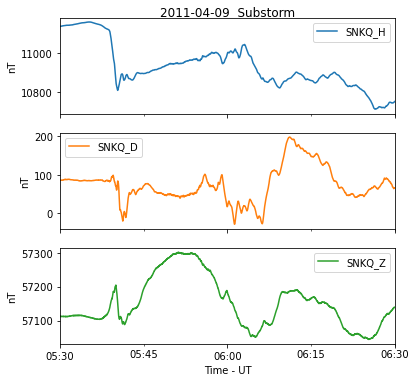

In [2]:
# Plot a simple time series from
# a single station loaded using
# the THEMIS module

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import gmag.arrays.themis as themis

# define start and end dates for plotting
sdate = '2011-04-09 05:30:00'
edate = '2011-04-09 06:30:00'

# load data
th_dat, th_meta = themis.load(['SNKQ'],sdate,ndays=1)

# plot all data in the DataFrame between
# sdate and edate
th_dat[sdate:edate].plot(ylabel='nT', xlabel='Time - UT', figsize=[6,6],subplots=True)
plt.title(sdate[0:11]+' Substorm',y=3.35)

# CARISMA substorm plot, multiple stations

Plot H component data from multiple stations apart of the CARISMA array. 

File 20050717GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717GILL.F01.gz
File 20050717ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717ISLL.F01.gz
File 20050717PINA.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717PINA.F01.gz
File 20050717RABB.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717RABB.F01.gz
File 20050717FSMI.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSMI.F01.gz
File 20050717FSIM.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717FSIM.F01.gz
File 20050717MCMU.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2005\07\17\20050717MCMU.F01.gz


Text(0.5, 8.25, '2005-07-17  Substorm/Pseudobreakup')

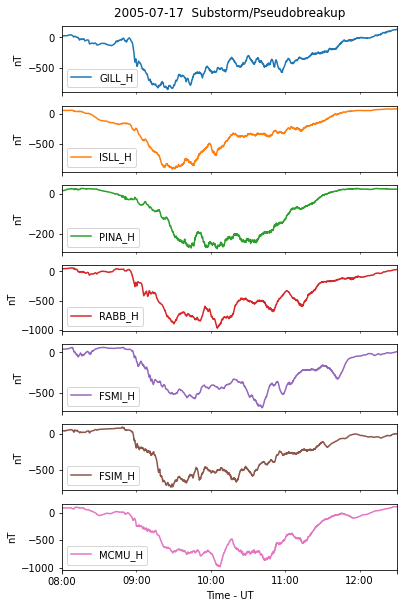

In [1]:
# Plot multi-panel plot of the H compoment
# magnetic field for select CARSIMA stations

# import required modules
import gmag.arrays.carisma as carisma
import numpy as np
import matplotlib.pyplot as plt

# define start and end date for plotting and loading
# assume a single day is loaded
sdate = '2005-07-17 08:00:00'
edate = '2005-07-17 12:30:00'

# define component to be plotted
comp='H'

# load data
car_dat, car_meta=carisma.load(['GILL','ISLL','PINA','RABB','FSMI','FSIM','MCMU'],sdate)

# find the correct columns of the DataFrame
p_col = [col for col in car_dat.columns if col[-1] == comp]

# plot the DataFrame between sdate and edate 
# plot only p_col columns and subtrac the mean from each column
# before plotting
car_dat[sdate:edate][p_col].subtract(car_dat[p_col].mean()).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[6,10],subplots=True)
plt.title(sdate[0:11]+' Substorm/Pseudobreakup',y=8.25)

## CARISMA ULF waves stacked plot

File 20141105PINA.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105PINA.F01.gz
File 20141105ISLL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105ISLL.F01.gz
File 20141105GILL.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105GILL.F01.gz
File 20141105FCHU.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105FCHU.F01.gz
File 20141105RANK.F01.gz exists use force=True to download
Loading: D:\data\magnetometer\CARISMA\2014\11\05\20141105RANK.F01.gz


Text(0.5, 1.0, '2014-11-05  ULF Wave')

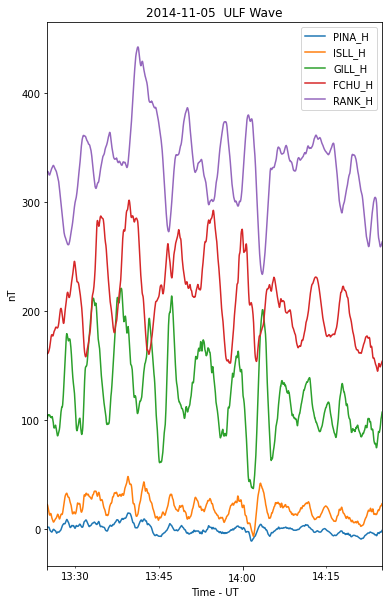

In [3]:
# plot a stacked plot of CARISMA the H component
# magnetic field for stations along the Churchill line

# import required modules
import gmag.arrays.carisma as carisma
import numpy as np
import matplotlib.pyplot as plt

# define start and end date for plotting 
# use start date for loading data
sdate = '2014-11-05 13:25:00'
edate = '2014-11-05 14:25:00'

# define component for plotting
comp='H'

# load data
car_dat, car_meta=carisma.load(['PINA','ISLL','GILL','FCHU','RANK'],sdate)

# find the columns from the loaded DataFrame that have comp
# in the title, these are the columns that will be plotted
p_col = [col for col in car_dat.columns if col[-1] == comp]

# determine the shift to apply to each time series so that they don't
# overlatp

# the shift is determined using the DataFrame returned by the describe()
# method which stores the DataFrame stats including max and min of each column
# only use columns from p_col and values between the start and end of plotting
# defined by sdate and edate
# the shift in the y direction is defined by 1.5 times the range of the series
y_shift = np.array([(val['max']-val['min'])/1.5 for col_h, val in car_dat[sdate:edate][p_col].describe().iteritems()])

# the cumsum() method determines the cumalitative sum up
# to each index
# the cumsum() ensures timeseries don't overlap
y_shift = (y_shift-y_shift.min()).cumsum()

# plot p_col columns of the data frame between sdate and edate
# subtract the mean from each time series and apply the y-shit
car_dat[sdate:edate][p_col].subtract(car_dat[sdate:edate][p_col].mean()-y_shift).plot(ylabel='nT', xlabel='Time - UT',
                                                            figsize=[6,10])
plt.title(sdate[0:11]+' ULF Wave')